In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

# Importing the data set

In [2]:
df = pd.read_csv('/Users/siddharth/Code/Python/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploring Churn Distribution

In [4]:
colors = ['#B6E2A1', '#EF4B4B']
r_g=sns.color_palette(colors)

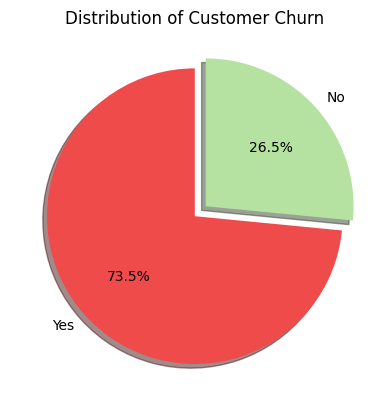

In [5]:
target = df["Churn"].value_counts().to_frame()
target=target.reset_index()
plt.pie(target['count'], labels=['Yes', 'No'], autopct='%.1f%%', explode=[0,0.1], shadow=True, startangle=90, colors=r_g[::-1])
plt.title('Distribution of Customer Churn')
plt.show()

Around 3/4 of the customers have left the company in the time frame.

In [6]:
#bar plot function to plot churn rate distribution by categorical feature

def bar_chart(column, df=df):
    plt.figure(figsize=(10, 8))
    cat_df = df.groupby([column, 'Churn']).size().reset_index()
    cat_df=cat_df.rename(columns={0:'Count'})
    
    value_counts_df = df[column].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]

    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    percentage = [round(element / sum(num_list)*100, 1) for element in num_list]

    print(tabulate(cat_df, showindex="never", tablefmt='fancy_grid', headers='keys'))

    sns.barplot(data=cat_df, x=column, y='Count', hue='Churn', palette=r_g)



    plt.title(f'Churn rate distribution by feature - {column} (Count of {convert_to_readable_list(categories)} is {convert_to_readable_percentages(percentage)} respectively)')
    plt.show()


def convert_to_readable_list(objects):
    if len(objects) == 1:
        return objects[0]
    elif len(objects) == 2:
        return f"{objects[0]} and {objects[1]}"
    else:
        return f"{', '.join(objects[:-1])}, and {objects[-1]}"
    
def convert_to_readable_percentages(numbers):
    percentages = [f"{num}% " for num in numbers]
    
    if len(percentages) == 1:
        return percentages[0]
    elif len(percentages) == 2:
        return f"{percentages[0]}and {percentages[1]}"
    else:
        return f"{', '.join(percentages[:-1])},and {percentages[-1]}"




## Demographic categories

╒══════════╤═════════╤═════════╕
│ gender   │ Churn   │   Count │
╞══════════╪═════════╪═════════╡
│ Female   │ No      │    2549 │
├──────────┼─────────┼─────────┤
│ Female   │ Yes     │     939 │
├──────────┼─────────┼─────────┤
│ Male     │ No      │    2625 │
├──────────┼─────────┼─────────┤
│ Male     │ Yes     │     930 │
╘══════════╧═════════╧═════════╛


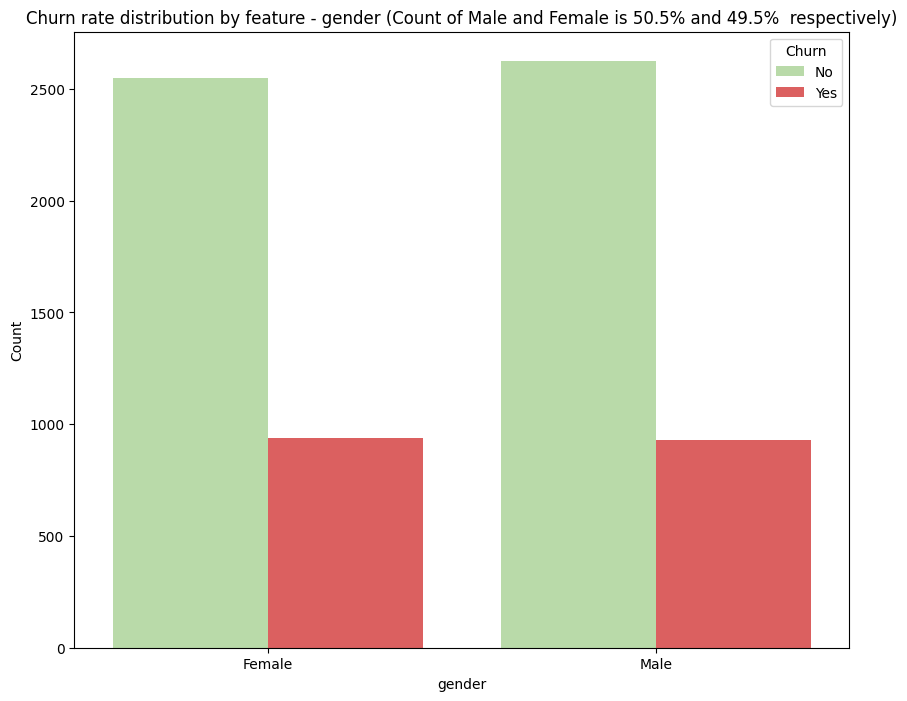

In [7]:
bar_chart('gender')

╒═════════════════╤═════════╤═════════╕
│ SeniorCitizen   │ Churn   │   Count │
╞═════════════════╪═════════╪═════════╡
│ No              │ No      │    4508 │
├─────────────────┼─────────┼─────────┤
│ No              │ Yes     │    1393 │
├─────────────────┼─────────┼─────────┤
│ Yes             │ No      │     666 │
├─────────────────┼─────────┼─────────┤
│ Yes             │ Yes     │     476 │
╘═════════════════╧═════════╧═════════╛


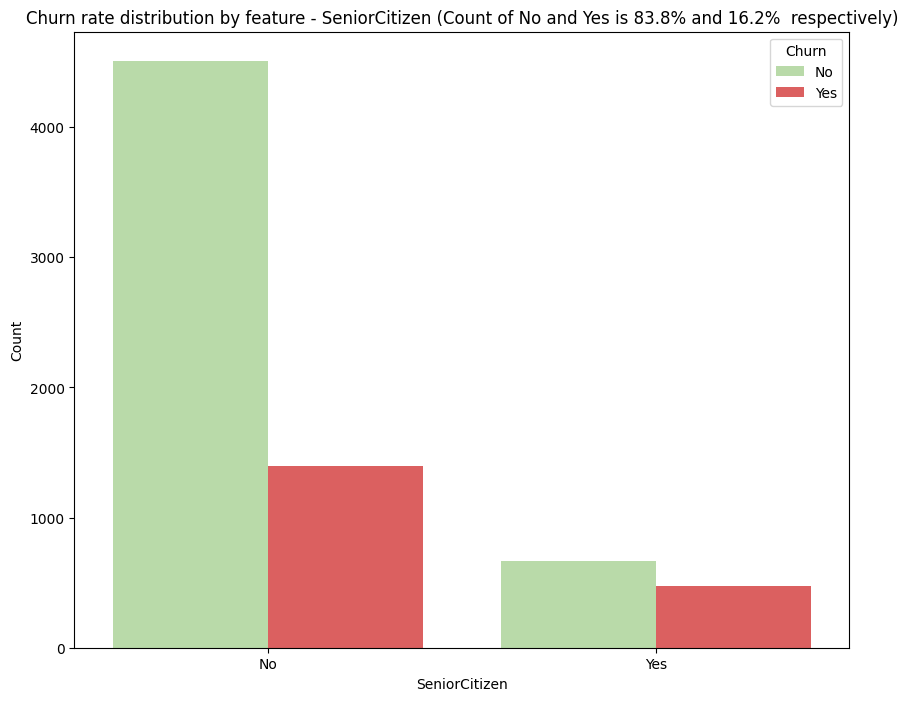

In [8]:
df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No" 
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
bar_chart('SeniorCitizen')

╒══════════════╤═════════╤═════════╕
│ Dependents   │ Churn   │   Count │
╞══════════════╪═════════╪═════════╡
│ No           │ No      │    3390 │
├──────────────┼─────────┼─────────┤
│ No           │ Yes     │    1543 │
├──────────────┼─────────┼─────────┤
│ Yes          │ No      │    1784 │
├──────────────┼─────────┼─────────┤
│ Yes          │ Yes     │     326 │
╘══════════════╧═════════╧═════════╛


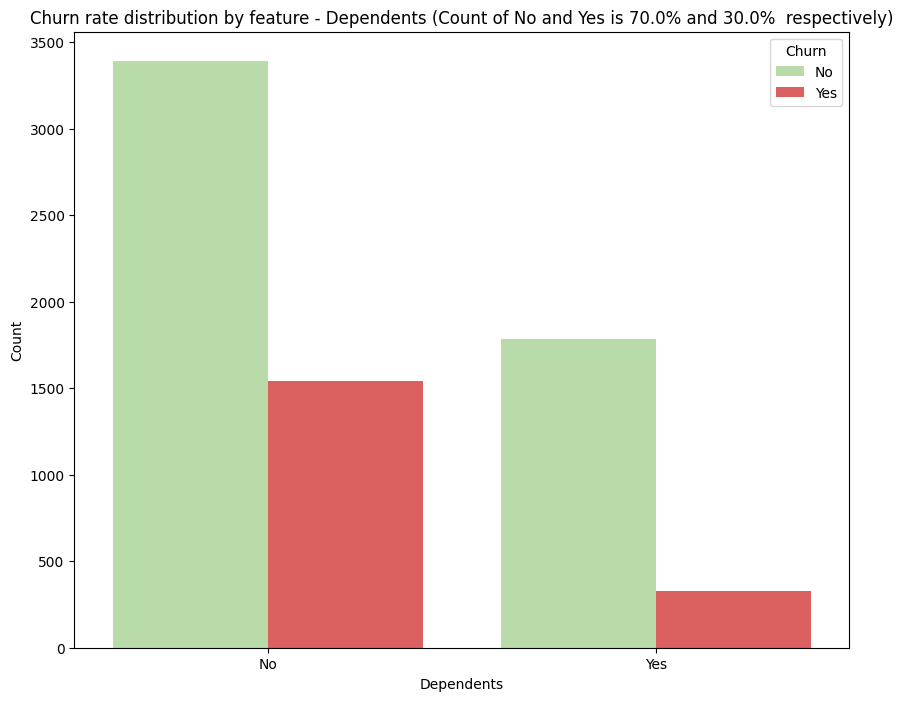

In [9]:
bar_chart('Dependents')

╒═══════════╤═════════╤═════════╕
│ Partner   │ Churn   │   Count │
╞═══════════╪═════════╪═════════╡
│ No        │ No      │    2441 │
├───────────┼─────────┼─────────┤
│ No        │ Yes     │    1200 │
├───────────┼─────────┼─────────┤
│ Yes       │ No      │    2733 │
├───────────┼─────────┼─────────┤
│ Yes       │ Yes     │     669 │
╘═══════════╧═════════╧═════════╛


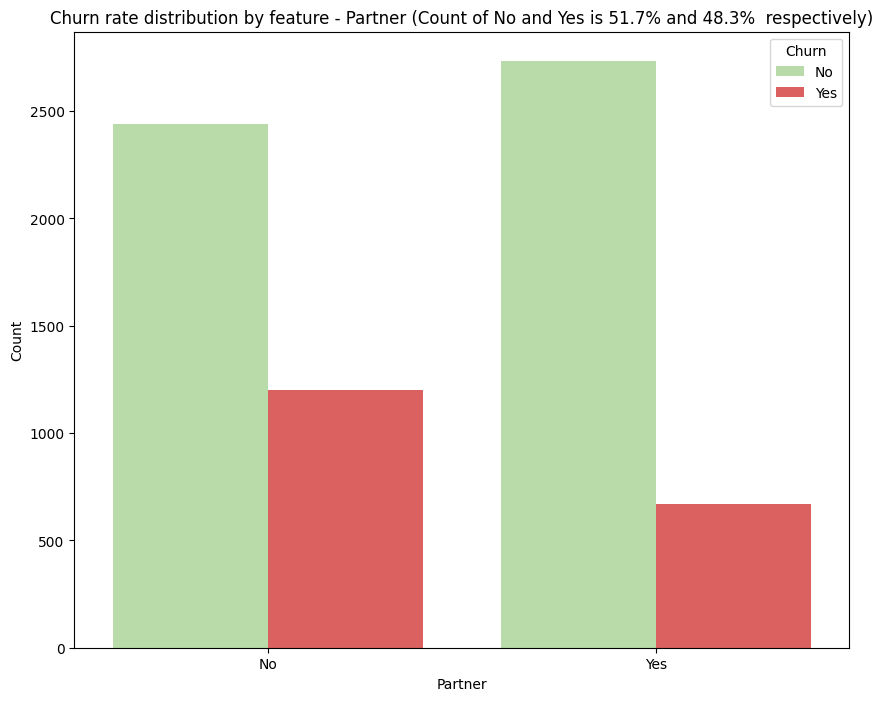

In [10]:
bar_chart('Partner')

## Demographic insights:
* Churn rate in females is slightly higher, but this is negligible.
* Younger customers (not senior citizens) have a higher churn rate than senior citizens.
* Customers with no dependent family members have a higher churn rate than customers with dependents. This observation is similar with customers having no partner. 

### The critical demographic section is **young customers with no partners and no dependents**. This group of customers is the most likely to churn.

## Services opted by customer

╒════════════════╤═════════╤═════════╕
│ PhoneService   │ Churn   │   Count │
╞════════════════╪═════════╪═════════╡
│ No             │ No      │     512 │
├────────────────┼─────────┼─────────┤
│ No             │ Yes     │     170 │
├────────────────┼─────────┼─────────┤
│ Yes            │ No      │    4662 │
├────────────────┼─────────┼─────────┤
│ Yes            │ Yes     │    1699 │
╘════════════════╧═════════╧═════════╛


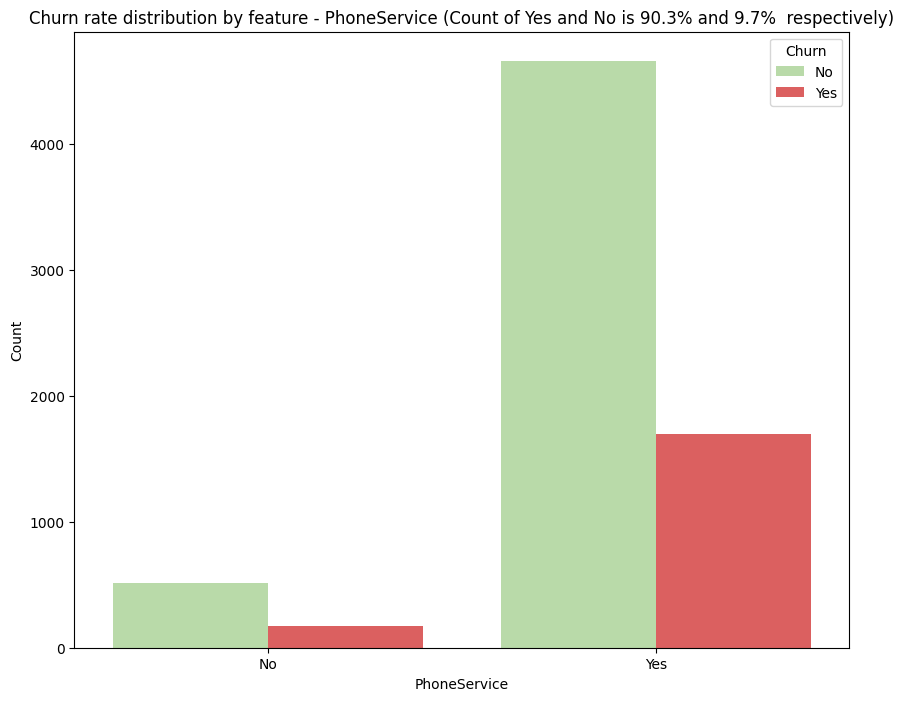

In [11]:
bar_chart('PhoneService')

╒══════════════════╤═════════╤═════════╕
│ MultipleLines    │ Churn   │   Count │
╞══════════════════╪═════════╪═════════╡
│ No               │ No      │    2541 │
├──────────────────┼─────────┼─────────┤
│ No               │ Yes     │     849 │
├──────────────────┼─────────┼─────────┤
│ No phone service │ No      │     512 │
├──────────────────┼─────────┼─────────┤
│ No phone service │ Yes     │     170 │
├──────────────────┼─────────┼─────────┤
│ Yes              │ No      │    2121 │
├──────────────────┼─────────┼─────────┤
│ Yes              │ Yes     │     850 │
╘══════════════════╧═════════╧═════════╛


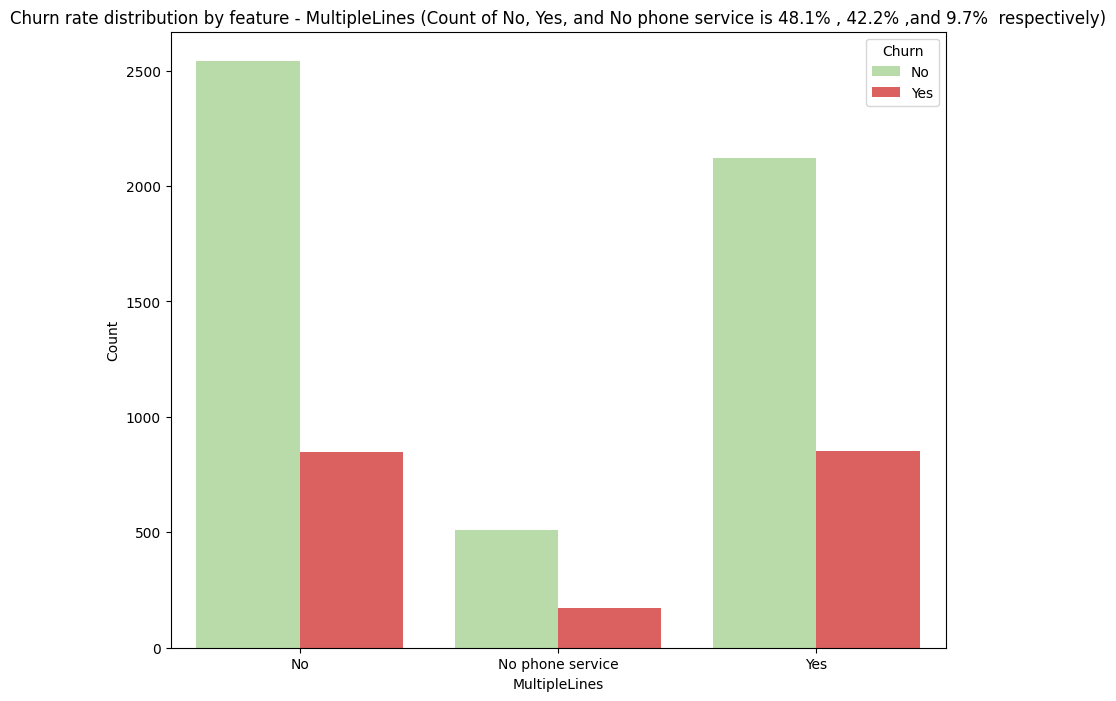

In [12]:
bar_chart('MultipleLines')

╒═══════════════════╤═════════╤═════════╕
│ InternetService   │ Churn   │   Count │
╞═══════════════════╪═════════╪═════════╡
│ DSL               │ No      │    1962 │
├───────────────────┼─────────┼─────────┤
│ DSL               │ Yes     │     459 │
├───────────────────┼─────────┼─────────┤
│ Fiber optic       │ No      │    1799 │
├───────────────────┼─────────┼─────────┤
│ Fiber optic       │ Yes     │    1297 │
├───────────────────┼─────────┼─────────┤
│ No                │ No      │    1413 │
├───────────────────┼─────────┼─────────┤
│ No                │ Yes     │     113 │
╘═══════════════════╧═════════╧═════════╛


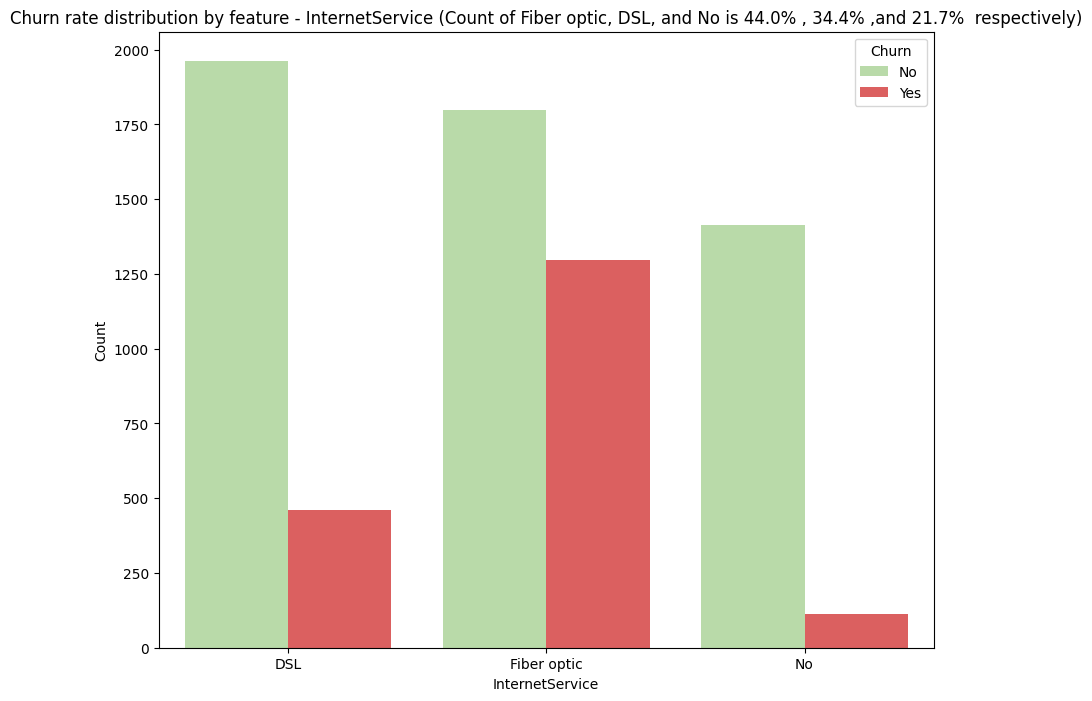

In [13]:
bar_chart('InternetService')

╒═════════════════════╤═════════╤═════════╕
│ OnlineSecurity      │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    2037 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1461 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1724 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     295 │
╘═════════════════════╧═════════╧═════════╛


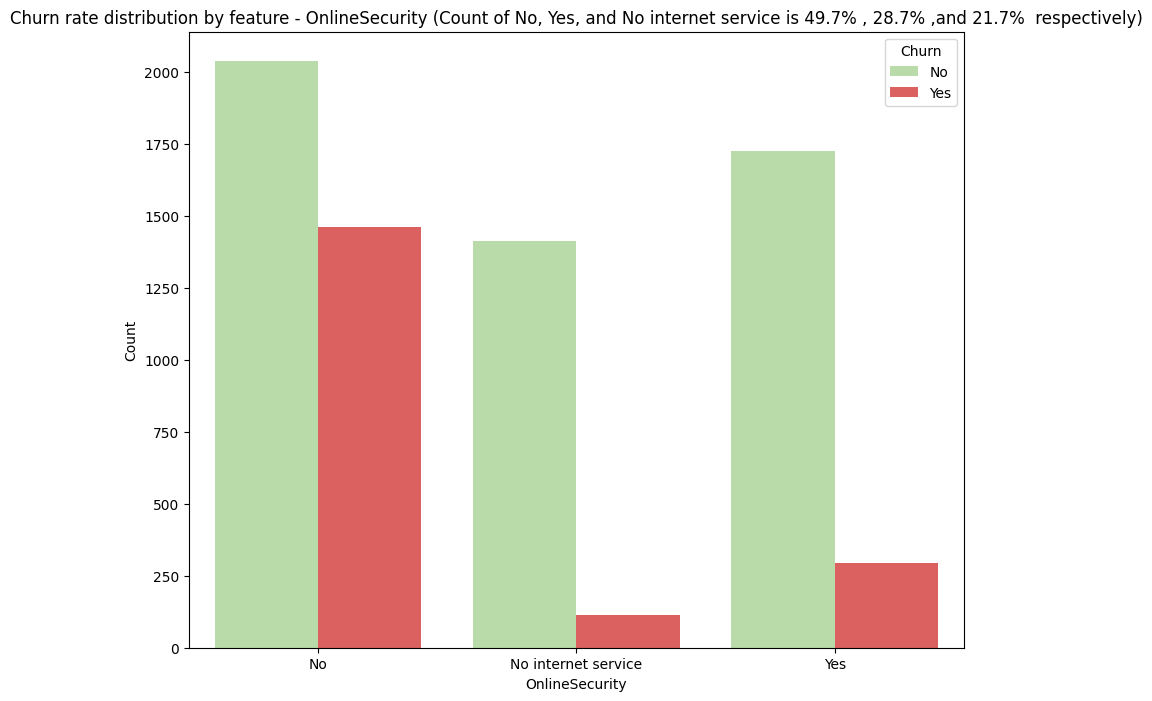

In [14]:
bar_chart('OnlineSecurity')

╒═════════════════════╤═════════╤═════════╕
│ OnlineBackup        │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1855 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1233 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1906 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     523 │
╘═════════════════════╧═════════╧═════════╛


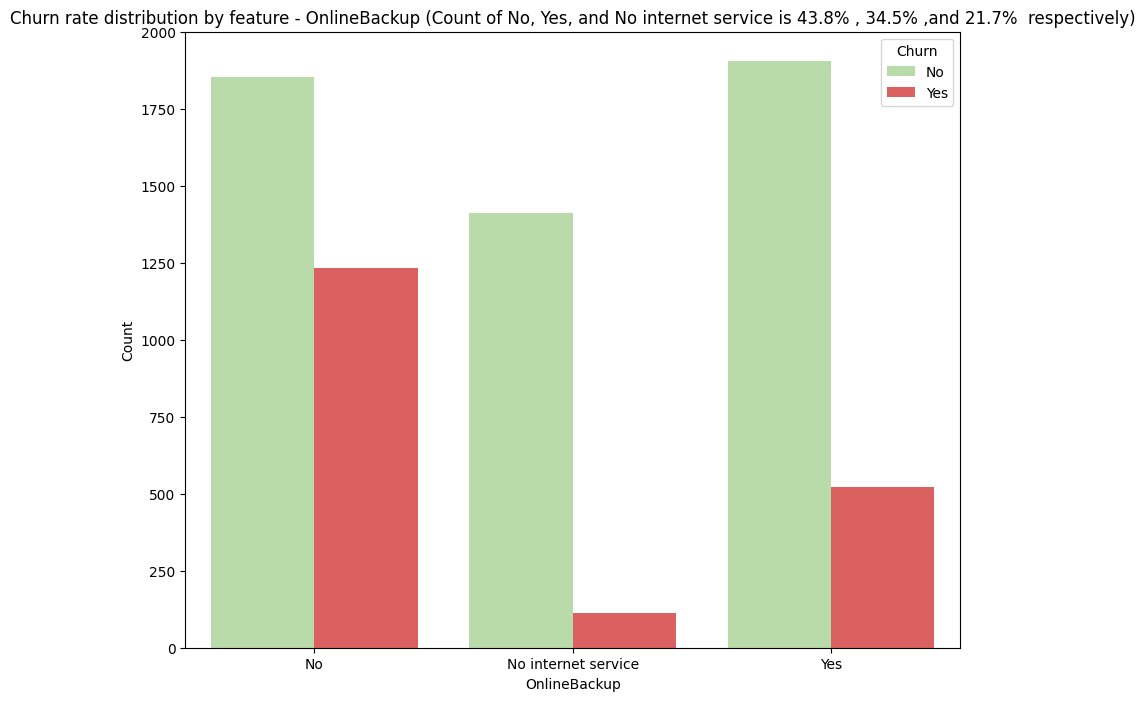

In [15]:
bar_chart('OnlineBackup')

╒═════════════════════╤═════════╤═════════╕
│ DeviceProtection    │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1884 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1211 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1877 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     545 │
╘═════════════════════╧═════════╧═════════╛


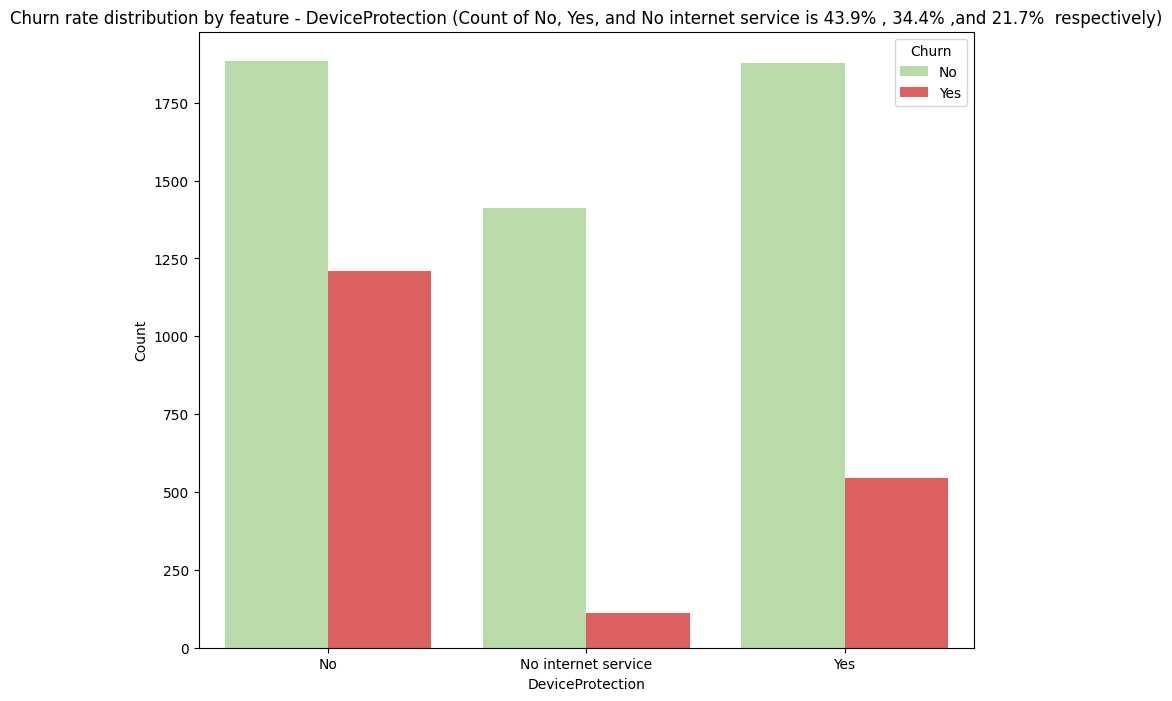

In [16]:
bar_chart('DeviceProtection')

╒═════════════════════╤═════════╤═════════╕
│ TechSupport         │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    2027 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1446 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1734 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     310 │
╘═════════════════════╧═════════╧═════════╛


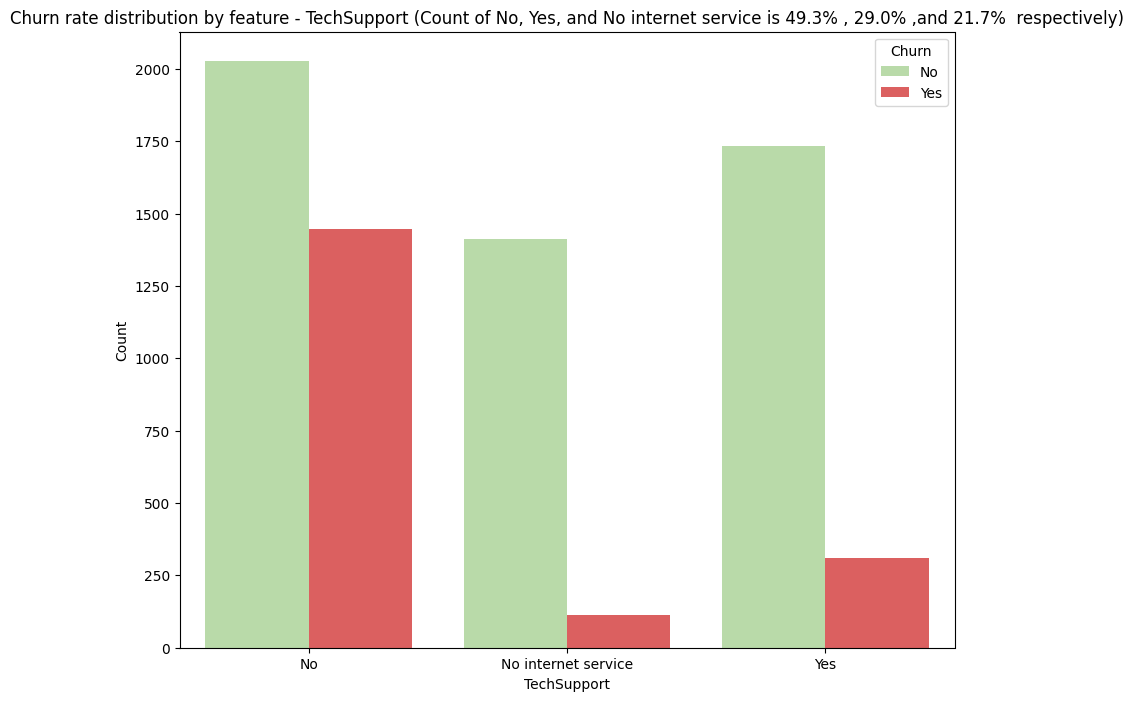

In [17]:
bar_chart('TechSupport')

╒═════════════════════╤═════════╤═════════╕
│ StreamingTV         │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1868 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │     942 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1893 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     814 │
╘═════════════════════╧═════════╧═════════╛


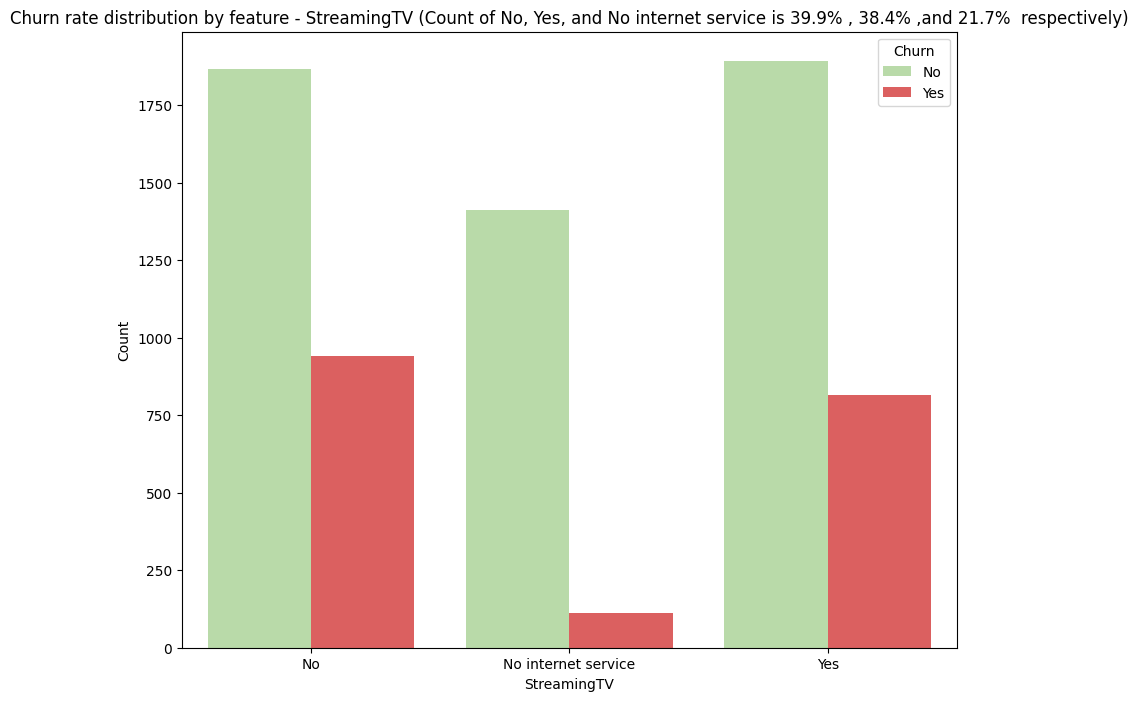

In [18]:
bar_chart('StreamingTV')

╒═════════════════════╤═════════╤═════════╕
│ StreamingMovies     │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1847 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │     938 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1914 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     818 │
╘═════════════════════╧═════════╧═════════╛


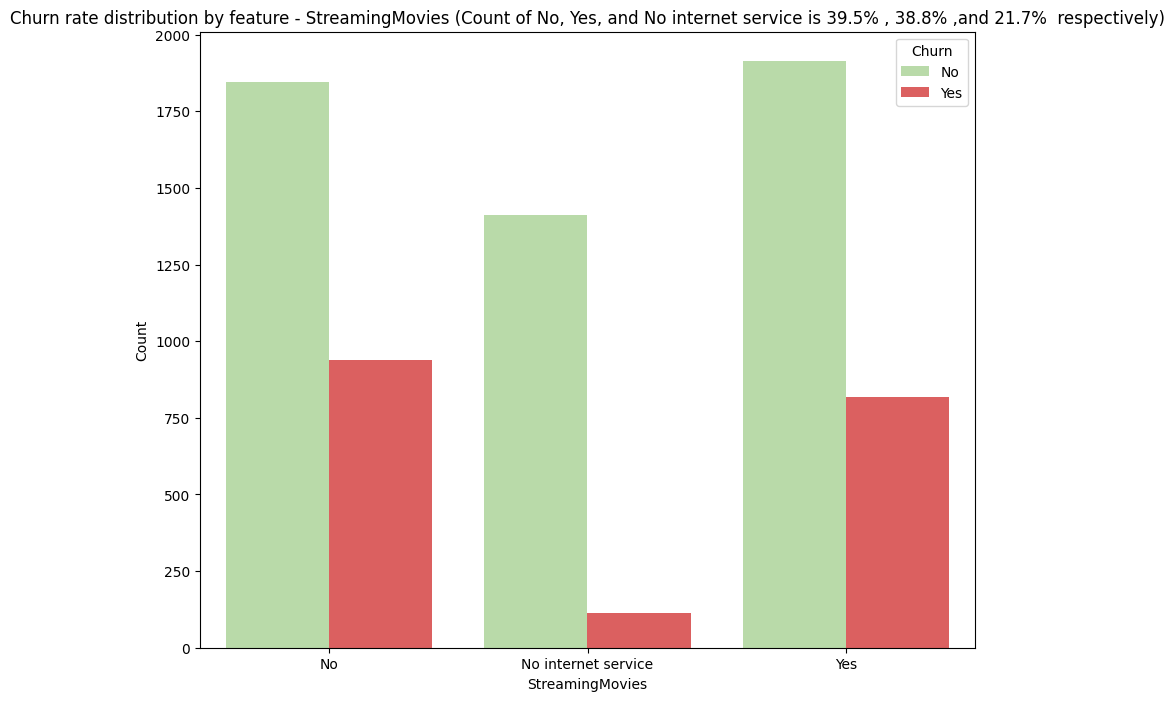

In [19]:
bar_chart('StreamingMovies')

## Insights from customer Services:
* One service metric has an effect on others. (E.g., having no phone service affects the multiple phone lines metric)
* Customers who have phone services are more likely to churn.
* Customers having fiber optic as an internet service are most likely to churn amongst customers having internet services.
* Tech support is a crucial part that has an impact on customer churn. Customers that don't avail tech support are very likely to churn. The case is similar for online security, online backup, and device protection. 
* Streaming movies and TV do not affect customer churn very much. The difference between the churn rate of customers who have TV/Movie streaming is negligible. 

### Customers with **phone service, fiber optic internet service, lack of online security, online backup, online security, tech support, and device protection** are the most likely to churn.

## Payment features

╒════════════════╤═════════╤═════════╕
│ Contract       │ Churn   │   Count │
╞════════════════╪═════════╪═════════╡
│ Month-to-month │ No      │    2220 │
├────────────────┼─────────┼─────────┤
│ Month-to-month │ Yes     │    1655 │
├────────────────┼─────────┼─────────┤
│ One year       │ No      │    1307 │
├────────────────┼─────────┼─────────┤
│ One year       │ Yes     │     166 │
├────────────────┼─────────┼─────────┤
│ Two year       │ No      │    1647 │
├────────────────┼─────────┼─────────┤
│ Two year       │ Yes     │      48 │
╘════════════════╧═════════╧═════════╛


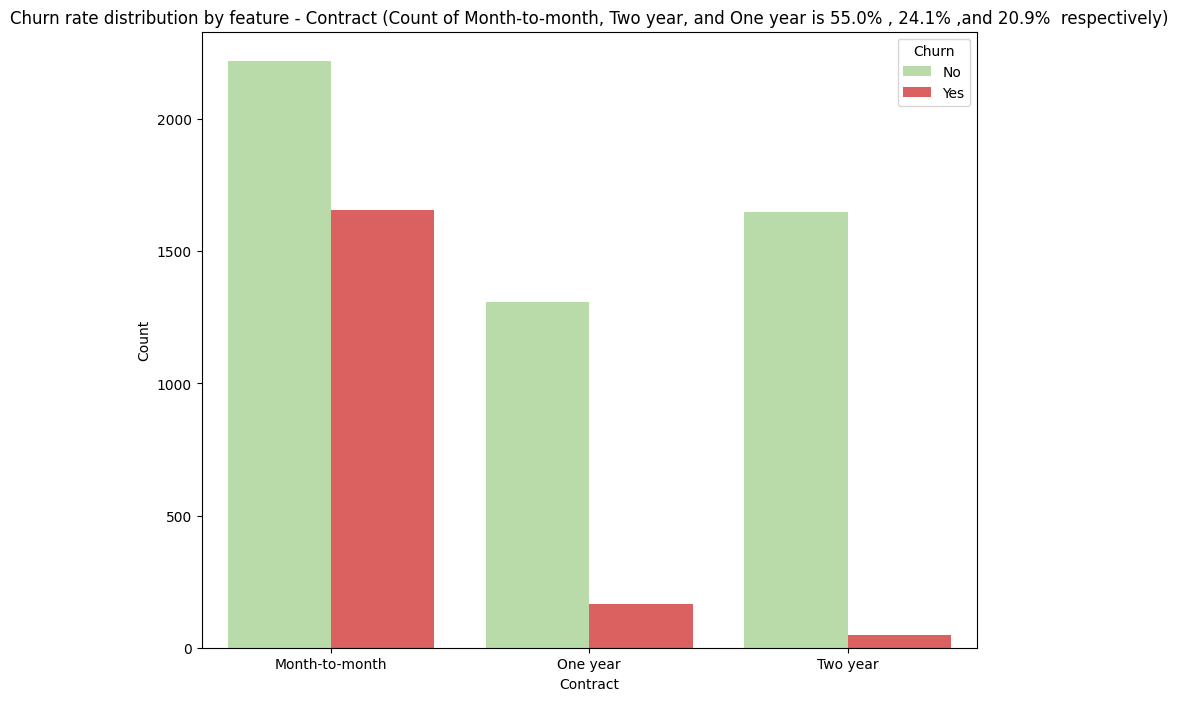

In [20]:
bar_chart('Contract')

╒════════════════════╤═════════╤═════════╕
│ PaperlessBilling   │ Churn   │   Count │
╞════════════════════╪═════════╪═════════╡
│ No                 │ No      │    2403 │
├────────────────────┼─────────┼─────────┤
│ No                 │ Yes     │     469 │
├────────────────────┼─────────┼─────────┤
│ Yes                │ No      │    2771 │
├────────────────────┼─────────┼─────────┤
│ Yes                │ Yes     │    1400 │
╘════════════════════╧═════════╧═════════╛


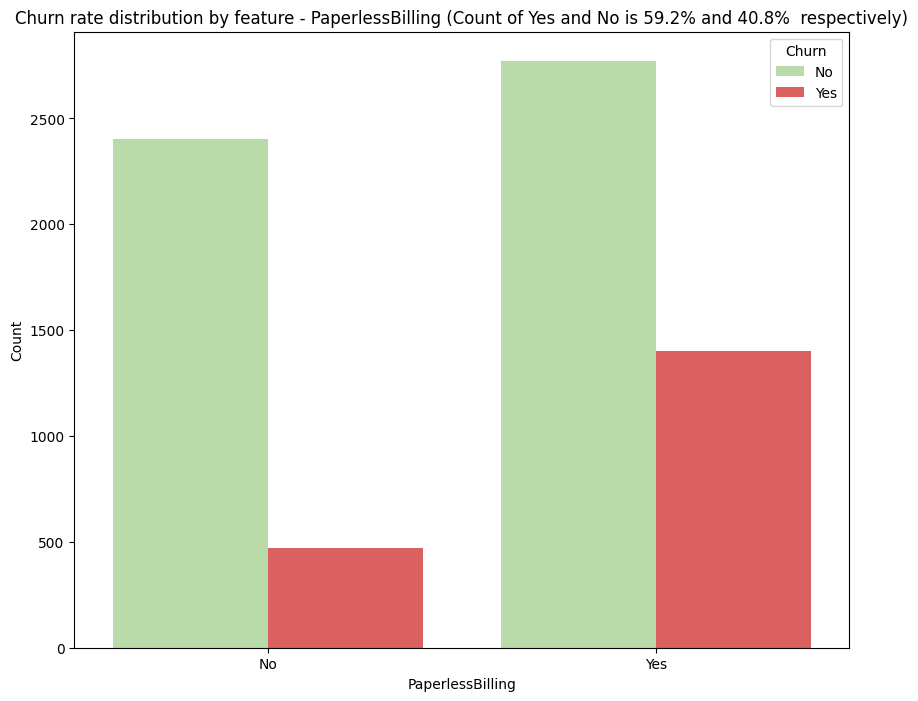

In [21]:
bar_chart('PaperlessBilling')

╒═══════════════════════════╤═════════╤═════════╕
│ PaymentMethod             │ Churn   │   Count │
╞═══════════════════════════╪═════════╪═════════╡
│ Bank transfer (automatic) │ No      │    1286 │
├───────────────────────────┼─────────┼─────────┤
│ Bank transfer (automatic) │ Yes     │     258 │
├───────────────────────────┼─────────┼─────────┤
│ Credit card (automatic)   │ No      │    1290 │
├───────────────────────────┼─────────┼─────────┤
│ Credit card (automatic)   │ Yes     │     232 │
├───────────────────────────┼─────────┼─────────┤
│ Electronic check          │ No      │    1294 │
├───────────────────────────┼─────────┼─────────┤
│ Electronic check          │ Yes     │    1071 │
├───────────────────────────┼─────────┼─────────┤
│ Mailed check              │ No      │    1304 │
├───────────────────────────┼─────────┼─────────┤
│ Mailed check              │ Yes     │     308 │
╘═══════════════════════════╧═════════╧═════════╛


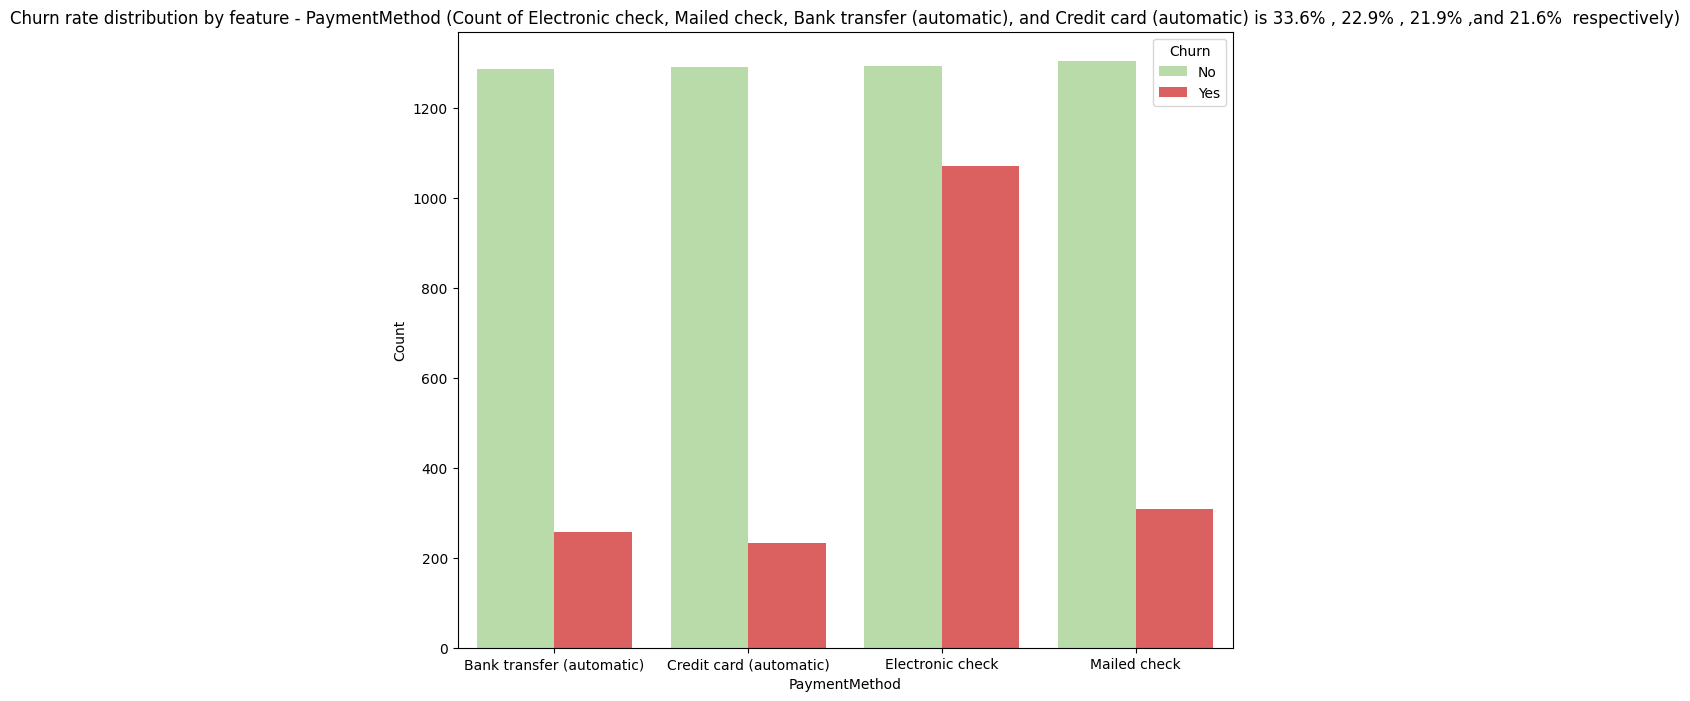

In [22]:
bar_chart('PaymentMethod')

## Payment feature insights:
* On average, the shorter the contract period, the higher the possibility of churn. This could be because of a high barrier to cancel when opting for long term contract options. 
* Churn rate is quite high for customers who use paperless billing. Similarily, the churn rate is highest for customers who pay using electronic checks.

### Customers who have **short contract periods, paperless billing, and pay using electronic cheques** are the most likely to churn. 

# Cleaning the Total Charges column
* Some of the values in this column are empty (' '), so they are replaced by the mean value.

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Churn rate frequency by numeric categories

In [24]:
def histogram(column):
    sns.histplot(data=df, x=column, hue='Churn', palette=r_g, multiple='stack', kde=True)
    plt.title(f'Churn rate frequency by {column} distribution')

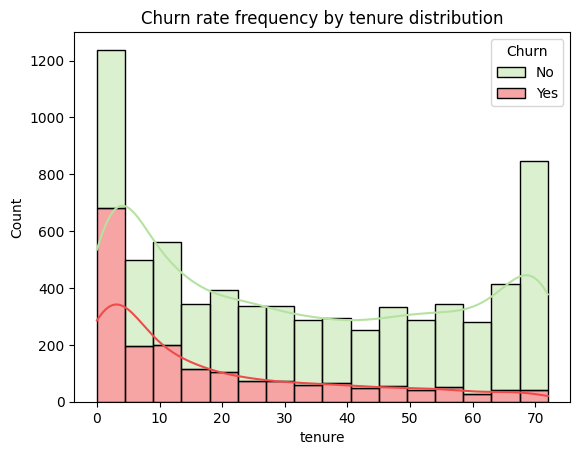

In [25]:
histogram('tenure')

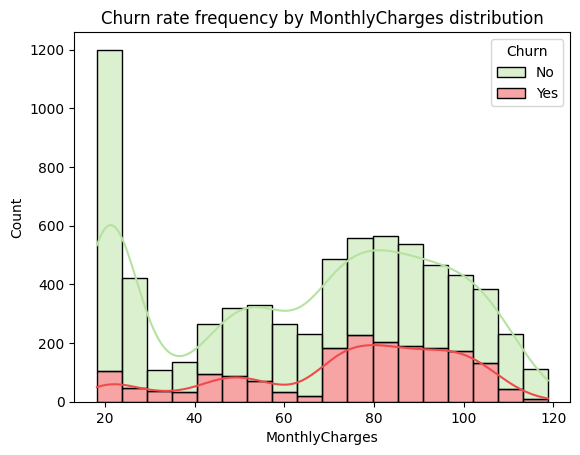

In [26]:
histogram('MonthlyCharges')

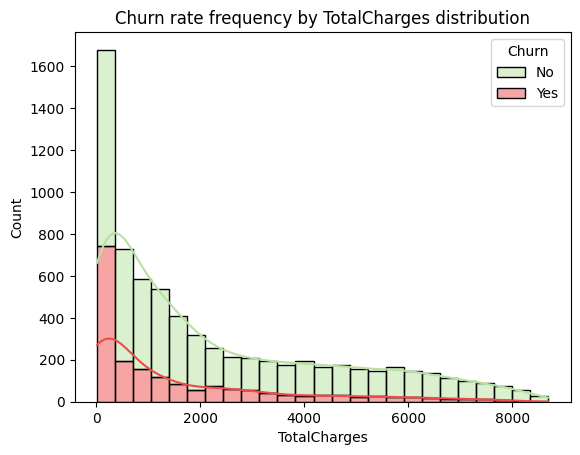

In [27]:
histogram('TotalCharges')

## Insights:
* Most customers leave the company within the first few months (0 to 9)
* The monthly charges histogram shows that customers having higher charges are more likely to leave the company. This could be a reason to reduce the charges levied by the company.

### Customers **with high monthly charges** are the most likely to churn within the **first 9 months**.

# Churn rate by column quantiles
* Now, we convert the columns of tenure, monthly charges, and total charges to three bins (low, medium, and high), so that we can see the churn distribution when these values are in certain quantiles.

In [28]:
bin_df = pd.DataFrame()

bin_df['tenure_bins'] =  pd.qcut(df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = df['Churn']

╒═══════════════╤═════════╤═════════╕
│ tenure_bins   │ Churn   │   Count │
╞═══════════════╪═════════╪═════════╡
│ low           │ No      │    1272 │
├───────────────┼─────────┼─────────┤
│ low           │ Yes     │    1099 │
├───────────────┼─────────┼─────────┤
│ medium        │ No      │    1821 │
├───────────────┼─────────┼─────────┤
│ medium        │ Yes     │     548 │
├───────────────┼─────────┼─────────┤
│ high          │ No      │    2081 │
├───────────────┼─────────┼─────────┤
│ high          │ Yes     │     222 │
╘═══════════════╧═════════╧═════════╛


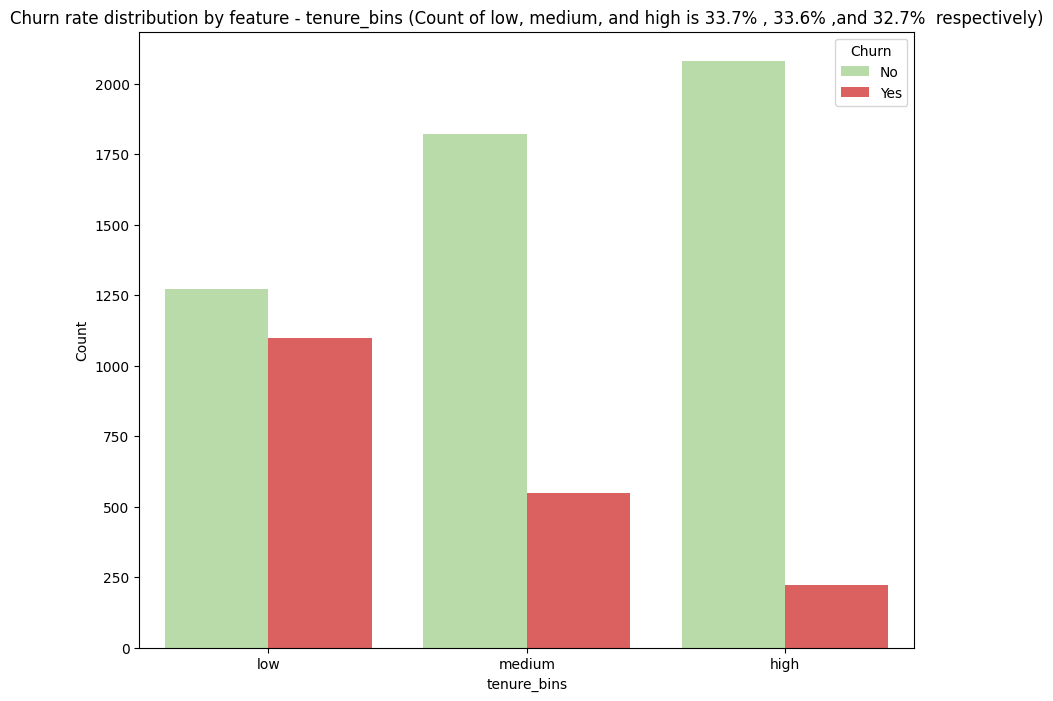

In [29]:
bar_chart('tenure_bins', bin_df)

╒═══════════════════════╤═════════╤═════════╕
│ MonthlyCharges_bins   │ Churn   │   Count │
╞═══════════════════════╪═════════╪═════════╡
│ low                   │ No      │    1978 │
├───────────────────────┼─────────┼─────────┤
│ low                   │ Yes     │     373 │
├───────────────────────┼─────────┼─────────┤
│ medium                │ No      │    1649 │
├───────────────────────┼─────────┼─────────┤
│ medium                │ Yes     │     696 │
├───────────────────────┼─────────┼─────────┤
│ high                  │ No      │    1547 │
├───────────────────────┼─────────┼─────────┤
│ high                  │ Yes     │     800 │
╘═══════════════════════╧═════════╧═════════╛


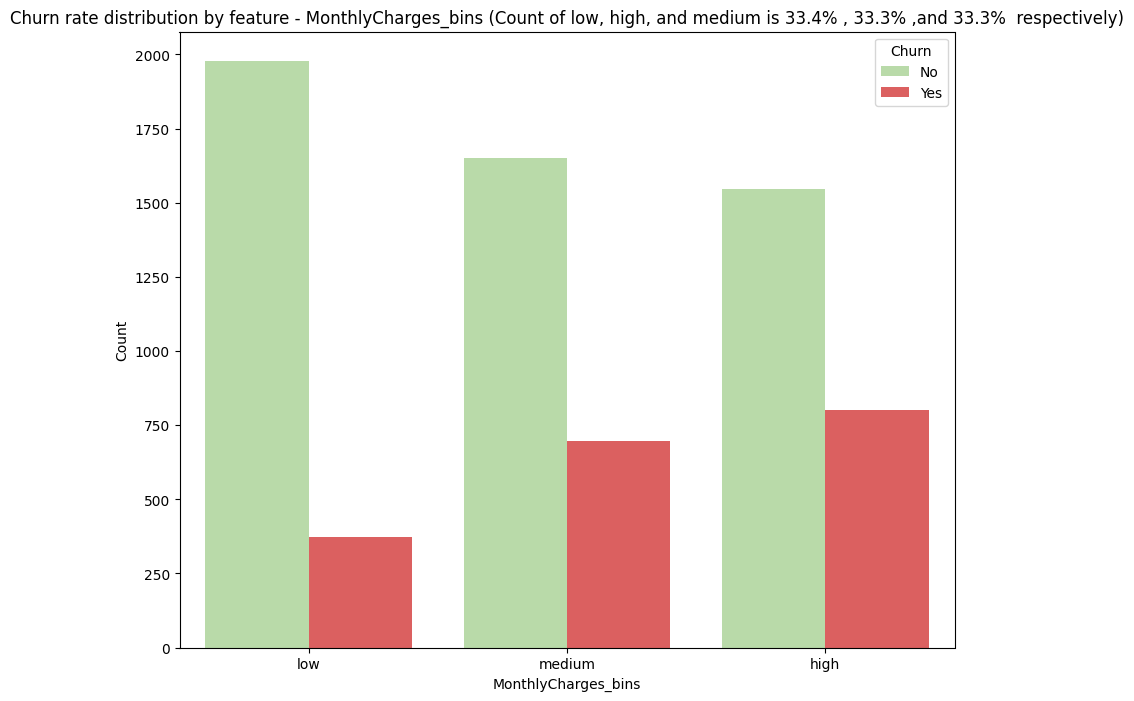

In [30]:
bar_chart('MonthlyCharges_bins', bin_df)

╒═════════════════════╤═════════╤═════════╕
│ TotalCharges_bins   │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ low                 │ No      │    1422 │
├─────────────────────┼─────────┼─────────┤
│ low                 │ Yes     │     926 │
├─────────────────────┼─────────┼─────────┤
│ medium              │ No      │    1792 │
├─────────────────────┼─────────┼─────────┤
│ medium              │ Yes     │     555 │
├─────────────────────┼─────────┼─────────┤
│ high                │ No      │    1960 │
├─────────────────────┼─────────┼─────────┤
│ high                │ Yes     │     388 │
╘═════════════════════╧═════════╧═════════╛


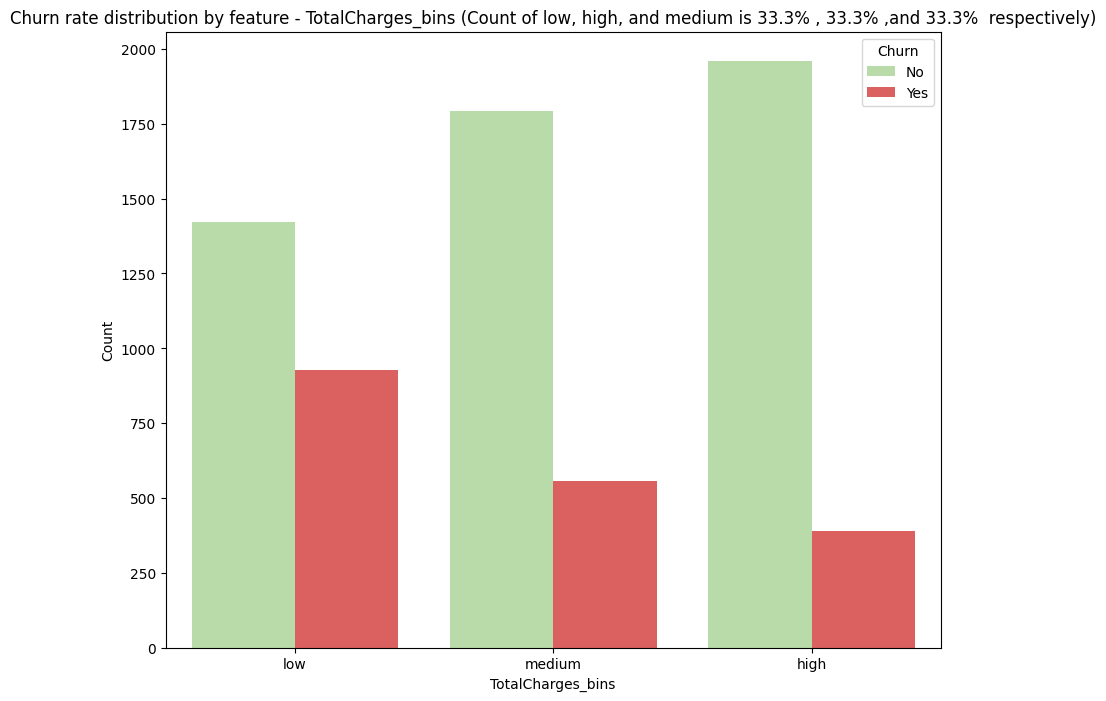

In [31]:
bar_chart('TotalCharges_bins', bin_df)

## Insights:
* Customers in the low tenure bin have a high churn rate.
* Similarily, customers in the high monthly charges bin have a high churn rate.

### Customers in the **low tenure** and **high monthly charges** bins are the most likely to churn.

# Data preprocessing
* Customer ID is not required for applying ML algorithms, so we remove it.

In [32]:
df.drop(["customerID"],axis=1,inplace = True)

binary_map = lambda feature:feature.map({'Yes':1, 'No':0})

df['Churn'] = df[['Churn']].apply(binary_map)

df['gender'] = df['gender'].map({'Male':1, 'Female':0})

binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

#transforming categorical features to boolean columns
df = pd.get_dummies(df, drop_first=True)

<AxesSubplot: >

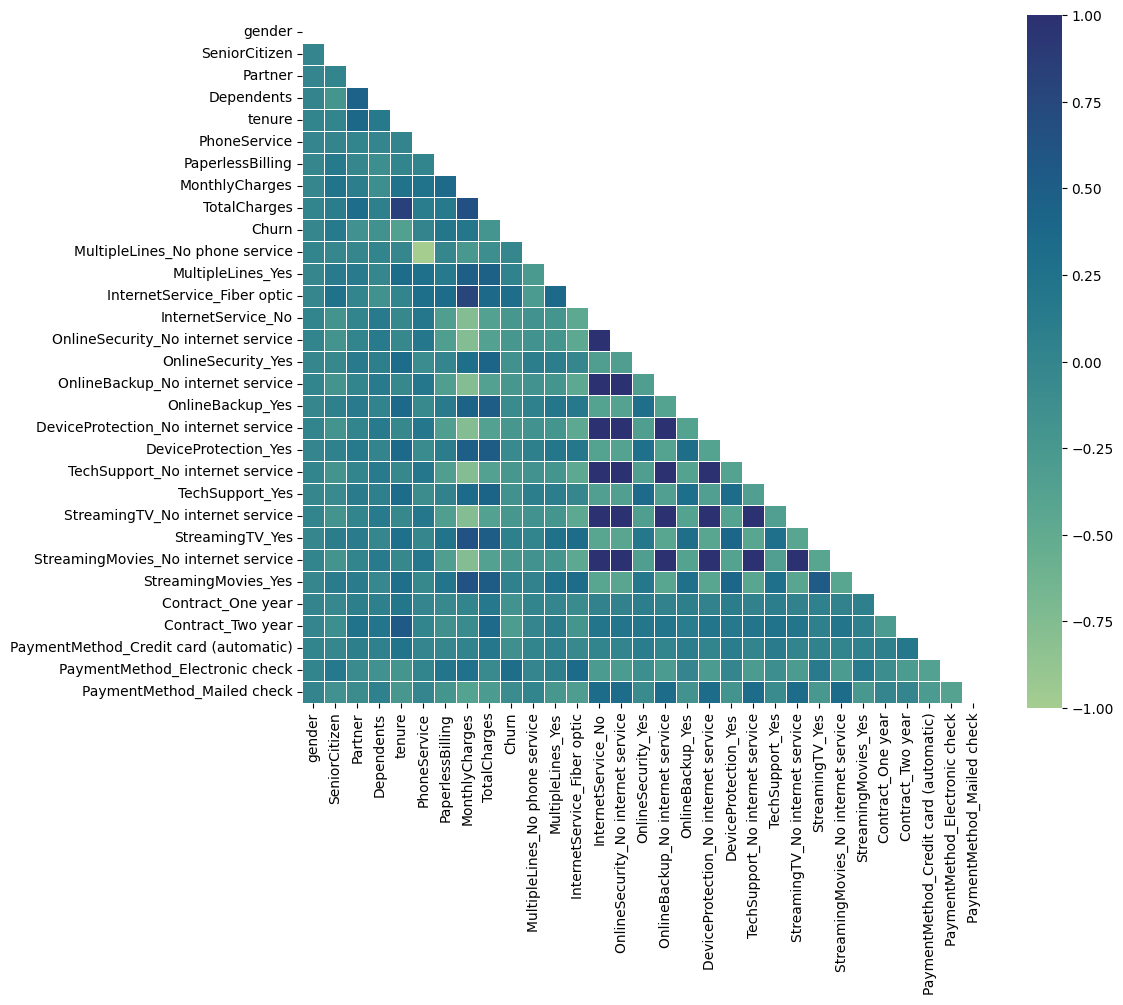

In [33]:
corr=df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, mask=mask)

# Generalized Linear Model
* This is used to gain the P values of each variable with the target variable (Churn)

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
#replacing special characters with underscores in column names
df_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df.columns]

df.columns=df_columns

In [36]:
glm_columns = [str(i) for i in df_columns if i not in ['customerID', 'Churn']]
glm_columns = ' + '.join(glm_columns)

glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.1
Date:                Wed, 31 May 2023   Deviance:                       5830.2
Time:                        09:26:50   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2806
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Insights from the GLM:
* If the absolute p-value (P>|z| column) is less than 0.05, it means that the feature affects the target variable significantly. 
* Examples of statistically significant features are TotalCharges, PaperlessBilling, tenure, SeniorCitizen

# Importance of features
* By examining the exponential coefficient values, it is possible to respond to the query regarding feature importances.
* This value predicts the change in value of churn when one feature is changed by one unit.

In [37]:
np.exp(res.params)

Intercept                                        2.263698
MultipleLines_No_phone_service[T.True]           1.374402
MultipleLines_Yes[T.True]                        1.563231
InternetService_Fiber_optic[T.True]              5.771697
InternetService_No[T.True]                       0.774659
OnlineSecurity_No_internet_service[T.True]       0.774659
OnlineSecurity_Yes[T.True]                       0.814293
OnlineBackup_No_internet_service[T.True]         0.774659
OnlineBackup_Yes[T.True]                         1.026467
DeviceProtection_No_internet_service[T.True]     0.774659
DeviceProtection_Yes[T.True]                     1.159475
TechSupport_No_internet_service[T.True]          0.774659
TechSupport_Yes[T.True]                          0.836634
StreamingTV_No_internet_service[T.True]          0.774659
StreamingTV_Yes[T.True]                          1.806117
StreamingMovies_No_internet_service[T.True]      0.774659
StreamingMovies_Yes[T.True]                      1.830740
Contract_One_y

* Values above one indicate increased churn, while values below 1 indicate a reduction in churn.
* We perform feature scaling to normalise the range of all characteristics so that each feature contributes about equally to the total distance (i.e., change in churn). For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range.

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])

# ML Algorithms

In [39]:
#Ml algos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Metrics for performance eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
x=df.drop(['Churn'], axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
def modelling(algo, name, params={}):
    model = algo(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    values = dict()
    values['Model'] = name
    values['Accuracy'] = str(accuracy_score(y_test, y_pred))
    values['Precision'] = str(precision_score(y_test, y_pred))
    values['Recall'] = str(recall_score(y_test, y_pred))
    values['f1 score'] = str(f1_score(y_test, y_pred))

    print_scores(name, values)
    return model

def print_scores(name, dictionary):
    max_key_length = max(len(key) for key in dictionary.keys())
    max_value_length = max(len(value) for value in dictionary.values())

    del dictionary['Model']

    print('═' * (max_key_length + max_value_length + 7))

    print(f"| {'Model'.ljust(max_key_length)} | {name.ljust(max_value_length)} |")

    print('═' * (max_key_length + max_value_length + 7))

    first=True
    for key, value in dictionary.items():
        if first:
            first=False
        else:
            print('-' * (max_key_length + max_value_length + 7))

        print(f"| {key.ljust(max_key_length)} | {value.ljust(max_value_length)} |")
    print('═' * (max_key_length + max_value_length + 7))

In [44]:
log_model = modelling(LogisticRegression, 'Logistic Regression')

═══════════════════════════════════
| Model     | Logistic Regression |
═══════════════════════════════════
| Accuracy  | 0.8218594748048261  |
-----------------------------------
| Precision | 0.6894409937888198  |
-----------------------------------
| Recall    | 0.5951742627345844  |
-----------------------------------
| f1 score  | 0.6388489208633092  |
═══════════════════════════════════


# Feature selection
* To identify the most informative features that help in the classification problem
* Recursive Feature Elimination with Cross-Validation (RFECV) is used for this purpose

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [50]:
log_reg = LogisticRegression()
rfecv = RFECV(estimator=log_reg, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

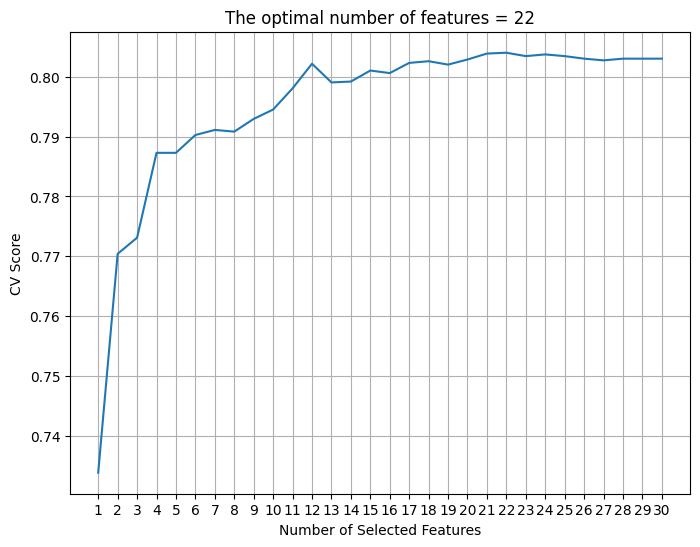

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, x.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title(f"The optimal number of features = {rfecv.n_features_}")
plt.show()



In [72]:
x_rfe = x.iloc[:, rfecv.support_]
print(f'Dimensions of x :{x.shape}')
print(f'Columns of x :{x.columns.to_list}')
print(f'Dimensions of x_rfe :{x_rfe.shape}')
print(f'Columns of x_rfe :{x_rfe.columns.to_list}')

Dimensions of x :(7043, 30)
Columns of x :<bound method IndexOpsMixin.tolist of Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card__automatic_',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check'],
      dtype='object')>
Dimensions of x_rfe :(7043, 22)
Columns of x_rfe :<bound method Inde

# Train-Test split with optimal features

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.2, random_state=42)

In [75]:
log_model = modelling(LogisticRegression, 'Logistic Regression classification')

══════════════════════════════════════════════════
| Model     | Logistic Regression classification |
══════════════════════════════════════════════════
| Accuracy  | 0.8183108587650816                 |
--------------------------------------------------
| Precision | 0.6833855799373041                 |
--------------------------------------------------
| Recall    | 0.5844504021447721                 |
--------------------------------------------------
| f1 score  | 0.630057803468208                  |
══════════════════════════════════════════════════


In [80]:
dt_model = modelling(DecisionTreeClassifier, "Decision Tree Classification")

════════════════════════════════════════════
| Model     | Decision Tree Classification |
════════════════════════════════════════════
| Accuracy  | 0.7182398864442867           |
--------------------------------------------
| Precision | 0.46629213483146065          |
--------------------------------------------
| Recall    | 0.4450402144772118           |
--------------------------------------------
| f1 score  | 0.45541838134430723          |
════════════════════════════════════════════


In [82]:
nb_model = modelling(GaussianNB, "Naive Bayes Classification")

══════════════════════════════════════════
| Model     | Naive Bayes Classification |
══════════════════════════════════════════
| Accuracy  | 0.6834634492547906         |
------------------------------------------
| Precision | 0.4499314128943759         |
------------------------------------------
| Recall    | 0.8793565683646113         |
------------------------------------------
| f1 score  | 0.5952813067150635         |
══════════════════════════════════════════


In [76]:
svc_model = modelling(SVC, 'SVC Classification')

══════════════════════════════════
| Model     | SVC Classification |
══════════════════════════════════
| Accuracy  | 0.8133427963094393 |
----------------------------------
| Precision | 0.6923076923076923 |
----------------------------------
| Recall    | 0.5308310991957105 |
----------------------------------
| f1 score  | 0.6009104704097116 |
══════════════════════════════════


In [77]:
rf_model = modelling(RandomForestClassifier, "Random Forest Classification")

════════════════════════════════════════════
| Model     | Random Forest Classification |
════════════════════════════════════════════
| Accuracy  | 0.7849538679914834           |
--------------------------------------------
| Precision | 0.6305970149253731           |
--------------------------------------------
| Recall    | 0.45308310991957107          |
--------------------------------------------
| f1 score  | 0.5273010920436818           |
════════════════════════════════════════════


### The Logistic Regression model has the highest accuracy scores, so we will use that for the classification problem.

# Hyperparameter tuning

In [85]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

model = LogisticRegression()

from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    result = search.fit(x_rfe, y)

params = result.best_params_

log_model = modelling(LogisticRegression, 'Logistic Regression Classification', params=params)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

══════════════════════════════════════════════════
| Model     | Logistic Regression Classification |
══════════════════════════════════════════════════
| Accuracy  | 0.8218594748048261                 |
--------------------------------------------------
| Precision | 0.6848484848484848                 |
--------------------------------------------------
| Recall    | 0.6058981233243967                 |
--------------------------------------------------
| f1 score  | 0.6429587482219061                 |
══════════════════════════════════════════════════


# Final scores for the model:

| Model     | Logistic Regression |
|-----------|---------------------|
| Accuracy  | 0.8218594748048261  |
| Precision | 0.6848484848484848  |
| Recall    | 0.6058981233243967  |
| f1 score  | 0.6429587482219061  |